In [613]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('agg')
params = {#'backend': 'ps',
            #'text.latex.preamble': ['\usepackage{gensymb}'],
            'axes.labelsize': 8, # fontsize for x and y labels (was 10)
            'axes.titlesize': 8,
            'font.size': 8, # was 10
            'legend.fontsize': 8, # was 10
            'xtick.labelsize': 8,
            'ytick.labelsize': 8,
            #'text.usetex': True,
            'figure.figsize': [3.39,2.095],
            'font.family': 'serif'
          }
matplotlib.rcParams.update(params)
import matplotlib.pyplot as plt

def getCDF(data):
    xdata = sorted(data)
    ydata = [x/len(xdata) for x in range(len(xdata))]
    return xdata,ydata

df1 = pd.read_pickle("test.pkl")
df2 = pd.read_pickle("control.pkl")
# CDF ALL
fig1, ax1 = plt.subplots(1,1)
x, y = getCDF(list( df1.unstack() /10**6))
ax1.plot(x, y, lw=2, marker='.',  markevery=80,  label='treatment')
x2, y2 = getCDF(list( df2.unstack()/10**6))
ax1.plot( x2, y2, lw=2, marker='x',  markevery=240,label='control')
ax1.set_xscale('log')
ax1.set_xlabel('Subscriber Demand (MB)')
fig1.tight_layout()
ax1.grid(1)
ax1.legend(loc='best')
#format_axes(ax1)
fig1.savefig('cdf_demand-all.pdf')
fig1.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


IOError: [Errno 2] No such file or directory: 'test.pkl'

In [7]:
from __future__ import division
%matplotlib nbagg
import pandas as pd
import numpy as np
import os, sys, glob
from collections import defaultdict
from python_latexify import latexify, format_axes
import matplotlib
matplotlib.rcParams.update(latexify())
import matplotlib.pyplot as plt
from pandas.tseries.resample import TimeGrouper

In [8]:
folder = "final_dw/"
#folder = "final_up/"
DATA = "final_processed/" + folder
OUTPUT = "final_output/" + folder
PLOTS = "plots/"+folder
if not os.path.exists(PLOTS):
    os.makedirs(PLOTS)
if not os.path.exists(OUTPUT):
    os.makedirs(OUTPUT)

In [9]:
df1 = pd.read_pickle(DATA + "test.pkl")
df2 = pd.read_pickle(DATA + "control.pkl")

#TABLE

<IPython.core.display.Javascript object>


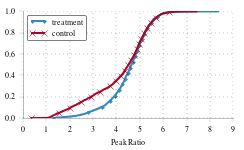

In [349]:
pr1 = daily_perc95_df1/df1.resample('D', how='mean')
pr2 = daily_perc95_df2/df2.resample('D', how='mean')

fig1, ax1 = plt.subplots(1,1)

x1, y1 = getCDF(pr1.mean())
x2, y2 = getCDF(pr2.mean())

ax1.plot(x1, y1, lw=2, marker='.',  markevery=80,  label='treatment')
ax1.plot( x2, y2, lw=2, marker='x', markevery=240, label='control')

ax1.legend(loc=2)
ax1.set_ylabel('')
ax1.set_xlabel('Peak Ratio')
ax1.grid(1)
fig1.tight_layout()
format_axes(ax1)
#fig1.savefig(PLOTS + 'primetime-weekday_usage_per_day_per_subs.pdf')
fig1.show()

In [363]:
print pr1.mean().describe()
print pr2.mean().describe()

count    1519.000000
mean        4.511270
std         0.886068
min         1.304012
25%         4.067689
50%         4.640746
75%         5.095405
max         8.337900
dtype: float64
count    4845.000000
mean        4.149220
std         1.286002
min         0.368699
25%         3.325203
50%         4.512306
75%         5.089741
max         7.420920
dtype: float64


<IPython.core.display.Javascript object>


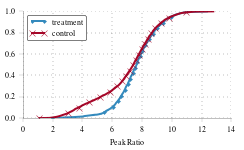

In [361]:
pr1 = daily_perc95_df1/df1.resample('D', how='mean')
pr2 = daily_perc95_df2/df2.resample('D', how='mean')

fig1, ax1 = plt.subplots(1,1)

x1, y1 = getCDF(pr1.mean(.95))
x2, y2 = getCDF(pr2.mean(.95))

ax1.plot( x1, y1, lw=2, marker='.',  markevery=80,  label='treatment')
ax1.plot( x2, y2, lw=2, marker='x', markevery=240, label='control')

ax1.legend(loc=2)
ax1.set_ylabel('')
ax1.set_xlabel('Peak Ratio')
ax1.grid(1)
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'peakratio_cdf_perc95-devices.pdf')
fig1.show()

In [4]:
perc95 = lambda x: x.quantile(0.95)
dataframes = {'test':df1, 'control':df2}

In [375]:
N1 = len(df1.columns)
N2 = len(df2.columns)
SCALE_CONT =  N1/N2
SCALE_TEST =  N2/N1
print N1, N2, SCALE_CONT, SCALE_TEST
GB = 10**9

1519 4845 0.313519091847 3.18959842001


In [ ]:
data = defaultdict(list)
for dfname in ['control', 'test']:
    df = dataframes[dfname]
    print "\n",folder, dfname, len(df.T)
    N = len(df.columns)
    
    print "Total bytes: ",df.sum(1).sum()/GB, "GB"
    print "Total bytes scaled: ",df.sum(1).sum()/N * 1000/GB, "GB"
    print "95% bytes seen at ISP: in an hour",np.percentile(df.resample('1H', how='sum').sum(1), 95) /N * 1000 /GB, "GB"
    print "mean bytes seen at ISP: in an hour",(df.resample('1H', how='sum').sum(1)).mean() /N * 1000 /GB, "GB"
    
    temp = df.sum(1).resample('1H', how='sum')
    pt = temp.between_time('20:00','00:00')
    npt = temp.between_time('00:00','20:00')
    print "Average Bytes in a prime-time hour: ", pt.mean() /N * 1000 /GB, "GB"
    print "Average Bytes in a non-prime-time hour: ", npt.mean() /N * 1000 /GB, "GB"
    
    print "Daily Bytes per subsc. (avg): ",df.resample('D', how='sum').mean(1).mean()/GB, "GB"
    #df_r = df * CONVERT_OCT
    #print "Mean traffic demand: ", df_r.mean().mean()
    #print "Median traffic demand: ", df_r.mean().median()
    #dem95 = df_r.apply(perc95).mean()
    #print "95% traffic demand: ", dem95
    #print "Utilization: ", dem95/ (105 * 1024) * 100

In [379]:
data = defaultdict(list)
for dfname in ['control', 'test']:
    df = dataframes[dfname]
    print "\n",folder, dfname, len(df.T)
    N = len(df.columns)
    
    print "Total bytes: ",df.sum(1).sum()/GB, "GB"
    print "Total bytes scaled: ",df.sum(1).sum()/N * 1000/GB, "GB"
    print "95% bytes seen at ISP: in an hour",np.percentile(df.resample('1H', how='sum').sum(1), 95) /N * 1000 /GB, "GB"
    print "mean bytes seen at ISP: in an hour",(df.resample('1H', how='sum').sum(1)).mean() /N * 1000 /GB, "GB"
    
    temp = df.sum(1).resample('1H', how='sum')
    pt = temp.between_time('20:00','00:00')
    npt = temp.between_time('00:00','20:00')
    print "Average Bytes in a prime-time hour: ", pt.mean() /N * 1000 /GB, "GB"
    print "Average Bytes in a non-prime-time hour: ", npt.mean() /N * 1000 /GB, "GB"
    
    print "Daily Bytes per subsc. (avg): ",df.resample('D', how='sum').mean(1).mean()/GB, "GB"
    #df_r = df * CONVERT_OCT
    #print "Mean traffic demand: ", df_r.mean().mean()
    #print "Median traffic demand: ", df_r.mean().median()
    #dem95 = df_r.apply(perc95).mean()
    #print "95% traffic demand: ", dem95
    #print "Utilization: ", dem95/ (105 * 1024) * 100


final_dw control 4845
Total bytes:  1294152.1002 GB
Total bytes scaled:  267110.856594 GB
95% bytes seen at ISP: in an hour 234.565405303 GB
mean bytes seen at ISP: in an hour 122.303505767 GB
Average Bytes in a prime-time hour:  205.079826553 GB
Average Bytes in a non-prime-time hour:  108.511319746 GB
Daily Bytes per subsc. (avg):  2.97157426892 GB

final_dw test 1519
Total bytes:  447806.624445 GB
Total bytes scaled:  294803.571063 GB
95% bytes seen at ISP: in an hour 244.423968687 GB
mean bytes seen at ISP: in an hour 134.983320084 GB
Average Bytes in a prime-time hour:  209.522717248 GB
Average Bytes in a non-prime-time hour:  122.35201811 GB
Daily Bytes per subsc. (avg):  3.30373673036 GB


## Daily 95 perc per device

In [74]:
#daily_perc95_df1 = df1.groupby(TimeGrouper('1D')).apply(perc95)
#daily_perc95_df2 = df2.groupby(TimeGrouper('1D')).apply(perc95)
#daily_perc95_df1.to_pickle(OUTPUT + "daily_95perc_test.pkl")
#daily_perc95_df2.to_pickle(OUTPUT + "daily_95perc_control.pkl")

In [75]:
(daily_perc95_df1 * CONVERT_OCT).reset_index().groupby('datetime')[0].mean().mean()

NameError: name 'daily_perc95_df1' is not defined

In [107]:
(daily_perc95_df2 * CONVERT_OCT).reset_index().groupby('datetime')[0].mean().mean()

1556.5798078901062

In [212]:
daily_perc95_df1 = pd.read_pickle(OUTPUT + "daily_95perc_test.pkl").reset_index().pivot(index='datetime', columns='Device_number')
daily_perc95_df2 = pd.read_pickle(OUTPUT + "daily_95perc_control.pkl").reset_index().pivot(index='datetime', columns='Device_number')

In [106]:
mean_median_per_day1 = df1.resample('1D', how='median')
mean_median_per_day2 = df2.resample('1D', how='median')

<IPython.core.display.Javascript object>


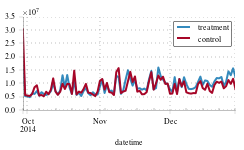

In [200]:
# TOTAL USAGE PER DAY
perDay1 = mean_median_per_day1
perDay2 = mean_median_per_day2
fig1, ax1 = plt.subplots(1,1)
(perDay1.sum(1)/N1).plot(ax=ax1, lw=2, markevery=10, label='treatment')
(perDay2.sum(1)/N2).plot(ax=ax1, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'median_usage_per_day_per_subs.pdf')
fig1.show()

<IPython.core.display.Javascript object>


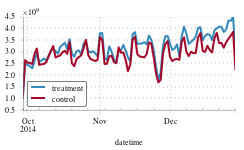

In [199]:
# TOTAL USAGE PER DAY
perDay1 = df1.resample('1D', how='sum')
perDay2 = df2.resample('1D', how='sum')
fig1, ax1 = plt.subplots(1,1)
(perDay1.sum(1)/N1).plot(ax=ax1, lw=2, markevery=10, label='treatment')
(perDay2.sum(1)/N2).plot(ax=ax1, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'total_usage_per_day_per_subs.pdf')
fig1.show()

<IPython.core.display.Javascript object>


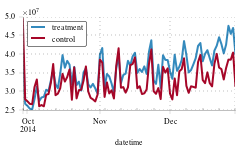

In [198]:
# MEAN USAGE PER DAY
perDay1 = df1.resample('1D', how='mean')
perDay2 = df2.resample('1D', how='mean')
fig1, ax1 = plt.subplots(1,1)
(perDay1.sum(1)/N1).plot(ax=ax1, lw=2, markevery=10, label='treatment')
(perDay2.sum(1)/N2).plot(ax=ax1, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'mean_usage_per_day_per_subs.pdf')
fig1.show()

<IPython.core.display.Javascript object>


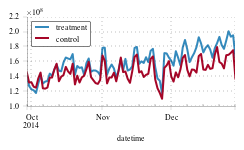

In [197]:
# 95% USAGE PER DAY
perDay1 = daily_perc95_df1
perDay2 = daily_perc95_df2
fig1, ax1 = plt.subplots(1,1)
(perDay1.sum(1)/N1).plot(ax=ax1, lw=2, markevery=10, label='treatment')
(perDay2.sum(1)/N2).plot(ax=ax1, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'perc95_usage_per_day_per_subs.pdf')
fig1.show()

In [21]:
def plot_primetime(df1, df2):
    N1 = len(df1.T)
    N2 = len(df2.T)
    perHR1 = df1.resample('1H', how='sum')
    perHR2 = df2.resample('1H', how='sum')
    pt1 = perHR1.between_time('20:00','00:00').resample('1D', 'mean')
    pt2 = perHR2.between_time('20:00','00:00').resample('1D', 'mean')
    fig1, ax1 = plt.subplots(1,1)
    (pt1.sum(1)/N1 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='treatment')
    (pt2.sum(1)/N2 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='control')
    ax1.legend(loc='best')
    ax1.set_ylabel('Hourly Demand per Subscriber (MB)')
    ax1.set_xlabel('')
    fig1.tight_layout()
    format_axes(ax1)
    fig1.savefig(PLOTS + 'primetime-weekday_usage_per_day_per_subs.pdf')
    fig1.show()
    return

In [ ]:
daily_perc95_df1.ix[day_index]

In [542]:
wdp1 = weekday1.apply(lambda x: np.argmax(x))
wdp2 = weekday2.apply(lambda x: np.argmax(x))
wep1 = weekend1.apply(lambda x: np.argmax(x))
wep2 = weekend2.apply(lambda x: np.argmax(x))

<IPython.core.display.Javascript object>


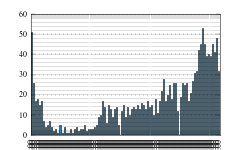

In [543]:
fig1, ax1 = plt.subplots()
pd.DataFrame(wdp1).reset_index().groupby(0)['Device_number'].count().plot(ax=ax1, kind='bar')

In [560]:
#print pd.DataFrame(wdp1).describe()
#print pd.DataFrame(wdp2).describe()
#print pd.DataFrame(wep1).describe()
#print pd.DataFrame(wep2).describe()

for w in [wdp1, wdp2, wep1, wep2]:
    print "1st", w.describe()
    w2 = w[w != w.describe()['top']]
    print "2nd", w2.describe()
    w3 = w2[w2 != w2.describe()['top']]
    print "3rd", w3.describe()
    print "\nDONE\n"

1st count         1519
unique          93
top       21:45:00
freq            53
dtype: object
2nd count         1466
unique          92
top       00:00:00
freq            51
dtype: object
3rd count         1415
unique          91
top       23:30:00
freq            48
dtype: object

DONE

1st count         4845
unique          96
top       22:30:00
freq           180
dtype: object
2nd count         4665
unique          95
top       22:15:00
freq           165
dtype: object
3rd count         4500
unique          94
top       00:00:00
freq           146
dtype: object

DONE

1st count         1519
unique          94
top       23:30:00
freq            44
dtype: object
2nd count         1475
unique          93
top       23:45:00
freq            42
dtype: object
3rd count         1433
unique          92
top       14:30:00
freq            35
dtype: object

DONE

1st count         4845
unique          96
top       22:30:00
freq           127
dtype: object
2nd count         4718
unique          

<IPython.core.display.Javascript object>


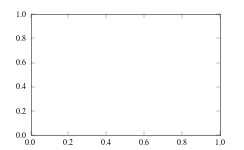

,0
count,1519
unique,94
top,23:30:00
freq,44


In [540]:
fig1, ax1 = plt.subplots()
pd.DataFrame(wep2).describe()

<IPython.core.display.Javascript object>


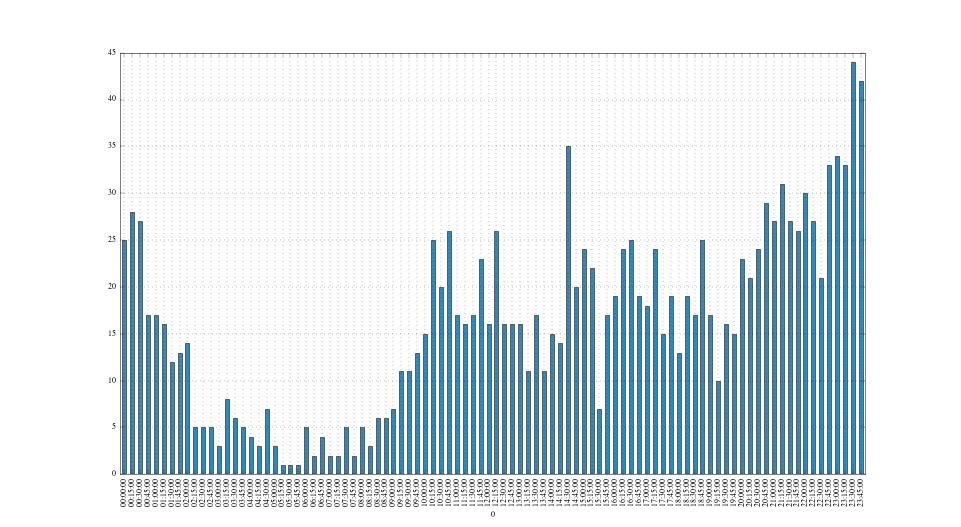

In [525]:
fig1, ax1 = plt.subplots()
pd.DataFrame(wep1).reset_index().groupby(0)['Device_number'].count().plot(ax=ax1, kind='bar')

<IPython.core.display.Javascript object>


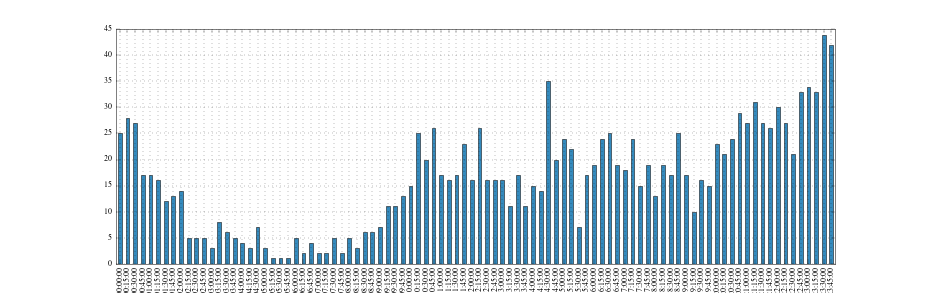

In [526]:
fig1, ax1 = plt.subplots()
pd.DataFrame(wep2).reset_index().groupby(0)['Device_number'].count().plot(ax=ax1, kind='bar')

In [468]:
# Peak time
peakt1 = df1.resample('1D', how='idxmax')
peakt2 = df2.resample('1D', how='idxmax')

In [476]:
best_peakt1 = peakt1.apply(lambda x: x.time()).reset_index().groupby(['datetime', 0])['Device_number'].count()
best_peakt2 = peakt2.apply(lambda x: x.time()).reset_index().groupby(['datetime', 0])['Device_number'].count()

<IPython.core.display.Javascript object>


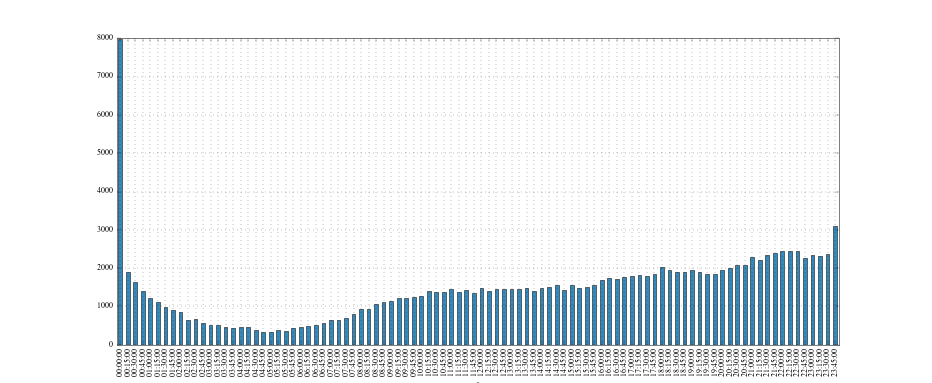

In [529]:
bestt1 = best_peakt1.reset_index().groupby(0)['Device_number'].sum()
bestt2 = best_peakt1.reset_index().groupby(0)['Device_number'].sum()
fig1, ax1 = plt.subplots(1,1)
#bestt1.plot(ax=ax1, kind='bar')
bestt2.plot(ax=ax1, kind='bar')
fig1.show()
#bestt1.sort(ascending=False)
#bestt2.sort(ascending=False)

In [395]:
dff = df1.resample('D', how='mean')
day_index = [i for i in range(len(dff)) if dff.index.weekday[i] in [0,1,2,3,4]]
df_1 = dff.ix[day_index]
df_1e = dff.ix[ [i for i in range(len(dff)) if i not in day_index ] ]
dff = df2.resample('D', how='mean')
day_index = [i for i in range(len(dff)) if dff.index.weekday[i] in [0,1,2,3,4]]
df_2 = dff.ix[day_index]
df_2e = dff.ix[ [i for i in range(len(dff)) if i not in day_index ] ]

In [396]:
dff = daily_perc95_df1
day_index = [i for i in range(len(dff)) if dff.index.weekday[i] in [0,1,2,3,4]]
pdf_1 = dff.ix[day_index]
pdf_1e = dff.ix[ [i for i in range(len(dff)) if i not in day_index ] ]
dff = daily_perc95_df2
day_index = [i for i in range(len(dff)) if dff.index.weekday[i] in [0,1,2,3,4]]
pdf_2 = dff.ix[day_index]
pdf_2e = dff.ix[ [i for i in range(len(dff)) if i not in day_index ] ]

In [403]:
prw1 = pdf_1/df_1
prw2 = pdf_2/df_2
pre1 = pdf_1e/df_1e
pre2 = pdf_2e/df_2e

<IPython.core.display.Javascript object>


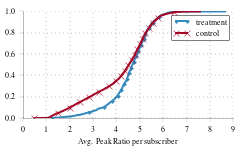

In [423]:
fig1, ax1 = plt.subplots(1,1)
ax2=  ax1
x, y = getCDF(prw1.mean())
ax2.plot(x, y, lw=2, marker='.',  markevery=80,  label='treatment')
x2, y2 = getCDF(prw2.mean())
ax2.plot( x2, y2, lw=2, marker='x', markevery=240, label='control')
#ax2.set_xscale('log')
ax1.set_xlabel('Avg. Peak Ratio per subscriber')
fig1.tight_layout()
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_peak_ratio-weekday.pdf')
fig1.show()

In [430]:
df = pd.DataFrame({'prw1':prw1.mean().describe(percentiles=[.05,.25,.5,.75,.95]),
                  'prw2':prw2.mean().describe(percentiles=[.05,.25,.5,.75,.95]),
                  'pre1':pre1.mean().describe(percentiles=[.05,.25,.5,.75,.95]),
                  'pre2':pre2.mean().describe(percentiles=[.05,.25,.5,.75,.95])})
df

,pre1,pre2,prw1,prw2
count,1519.000000,4845.000000,1519.000000,4845.000000
mean,4.342577,4.101474,4.578176,4.167957
std,1.072259,1.276644,0.901302,1.328947
min,1.097368,0.063582,1.239953,0.492653
5%,2.137520,1.562068,2.758601,1.519298
25%,3.857032,3.276197,4.153605,3.277222
50%,4.537254,4.393950,4.681151,4.528118
75%,5.057988,5.048542,5.182238,5.130781
95%,5.765088,5.792780,5.827500,5.823057
max,7.572073,7.396416,8.649017,7.567424


<IPython.core.display.Javascript object>


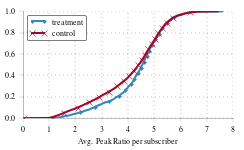

In [421]:
fig1, ax1 = plt.subplots(1,1)
ax2=  ax1
x, y = getCDF(pre1.mean())
ax2.plot(x, y, lw=2, marker='.',  markevery=80,  label='treatment')
x2, y2 = getCDF(pre2.mean())
ax2.plot( x2, y2, lw=2, marker='x', markevery=240, label='control')
#ax2.set_xscale('log')
ax1.set_xlabel('Avg. Peak Ratio per subscriber')
fig1.tight_layout()
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_peak_ratio-weekend.pdf')
fig1.show()

In [419]:
print "weekday test primetime hourly", prw1.mean().mean()
print "weekday control primetime hourly", prw2.mean().mean()
print "weekend test primetime hourly", pre1.mean().mean()
print "weekend control primetime hourly", pre2.mean().mean()

weekday test primetime hourly 4.57817610193
weekday control primetime hourly 4.16795663301
weekend test primetime hourly 4.342577422
weekend control primetime hourly 4.1014741175


In [55]:
print "weekday test primetime hourly", (weekday1.iloc[80:96].sum()/4).mean()/10**6.
print "weekday control primetime hourly", (weekday2.iloc[80:96].sum()/4).mean()/10**6
print "weekend test primetime hourly", (weekend1.iloc[80:96].sum()/4).mean()/10**6
print "weekend control primetime hourly", (weekend2.iloc[80:96].sum()/4).mean()/10**6

weekday test primetime hourly 233.127815724
weekday control primetime hourly 225.407221089
weekend test primetime hourly 246.93248256
weekend control primetime hourly 238.147017573


In [56]:
HRS = 20
print "weekday test nprimetime hourly", (weekday1.iloc[:80].sum()/HRS).mean()/10**6.
print "weekday control nprimetime hourly", (weekday2.iloc[:80].sum()/HRS).mean()/10**6
print "weekend test nprimetime hourly", (weekend1.iloc[:80].sum()/HRS).mean()/10**6
print "weekend control nprimetime hourly", (weekend2.iloc[:80].sum()/HRS).mean()/10**6

weekday test nprimetime hourly 124.175383667
weekday control nprimetime hourly 104.302538025
weekend test nprimetime hourly 143.088026426
weekend control nprimetime hourly 133.164135366


In [62]:
238.15/133.16

1.7884499849804747

<IPython.core.display.Javascript object>


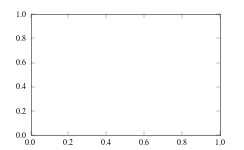

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [36]:
N1 = len(df1.T)
N2 = len(df2.T)
pt1 = weekday1.iloc[80:96].sum(1)/4 /N1
pt2 = weekday2.iloc[80:96].sum(1)/4 /N2
fig1, ax1 = plt.subplots(1,1)
(pt1 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='treatment')
(pt2 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
ax1.set_ylabel('Hourly Demand per Subscriber (MB)')
ax1.set_xlabel('')
fig1.tight_layout()
format_axes(ax1)
#fig1.savefig(PLOTS + 'primetime-weekday_usage_per_day_per_subs.pdf')
fig1.show()

In [22]:
plot_primetime(weekday1, weekday2)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

In [109]:
def getCDF2(data):
    xdata = sorted(data)[:int(len(data)*1)]
    ydata = [x/len(xdata) for x in range(len(xdata))]
    return xdata,ydata

1.71108878615
1.93125661986


1.70465343856
1.88103225225


<IPython.core.display.Javascript object>


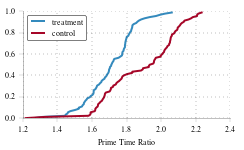

In [116]:
pt_test=  pt1.mean(1)/npt1.mean(1)
pt_cont = pt2.mean(1)/npt2.mean(1)
print pt_test.mean()
print pt_cont.mean()

fig1, ax1 = plt.subplots(1,1)
x,y = getCDF2(pt_test)
ax1.plot(x,y, lw=2, markevery=10, label='treatment')
x,y = getCDF2(pt_cont)
ax1.plot(x,y, lw=2, markevery=10, label='control')
#x,y = getCDF2((pt1/npt1).mean())
#ax1.plot(x,y, lw=2, markevery=10, label='treatment')
ax1.legend(loc='best')
#ax1.set_ylabel()
#ax1.set_xscale('log')
ax1.set_xlabel('Prime Time Ratio')
ax1.grid(1)
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_primetime_byvol.pdf')
fig1.show()

In [150]:
PLOTS

'plots/final_dw/'

In [98]:
np.percentile((pt2/npt2).mean(), 50)

2.9132457658890538

In [157]:
print (pt1/npt1).mean().describe(percentiles=[.05,.14,.25,.5,.75,.94])
print (pt2/npt2).mean().describe(percentiles=[.05,.08,.25,.5,.75,.94])

count    1519.000000
mean             inf
std              NaN
min         0.096943
5%          0.406606
14.0%       1.028484
25%         1.836476
50%         3.393556
75%         8.097762
94%       105.324709
max              inf
dtype: float64
count    4845.000000
mean             inf
std              NaN
min         0.066118
5%          0.880331
8%          0.988034
25%         1.519069
50%         2.913246
75%         6.963080
94%        97.537768
max              inf
dtype: float64


<IPython.core.display.Javascript object>


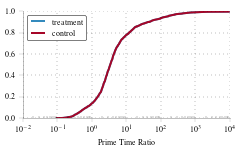

In [118]:
fig1, ax1 = plt.subplots(1,1)
x,y = getCDF((pt1/npt1).mean())
ax1.plot(x,y, lw=2, markevery=10, label='treatment')
x,y = getCDF((pt1/npt1).mean())
ax1.plot(x,y, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
#ax1.set_ylabel()
ax1.set_xscale('log')
ax1.set_xlabel('Prime Time Ratio')
ax1.grid(1)
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_primetime_persubs.pdf')
fig1.show()

<IPython.core.display.Javascript object>


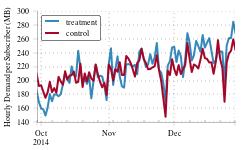

In [63]:
# TOTAL USAGE DURING PRIMETIME
N1 = len(df1.T)
N2 = len(df2.T)
perHR1 = df1.resample('1H', how='sum')
perHR2 = df2.resample('1H', how='sum')
pt1 = perHR1.between_time('20:00','00:00').resample('1D', 'mean')
pt2 = perHR2.between_time('20:00','00:00').resample('1D', 'mean')
fig1, ax1 = plt.subplots(1,1)
(pt1.sum(1)/N1 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='treatment')
(pt2.sum(1)/N2 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
ax1.set_ylabel('Hourly Demand per Subscriber (MB)')
ax1.set_xlabel('')
fig1.tight_layout()
format_axes(ax1)
#fig1.savefig(PLOTS + 'primetime_usage_per_day_per_subs.pdf')
fig1.show()

<IPython.core.display.Javascript object>


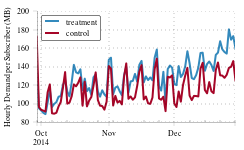

In [66]:
N1 = len(df1.T)
N2 = len(df2.T)
perHR1 = df1.resample('1H', how='sum')
perHR2 = df2.resample('1H', how='sum')
npt1 = perHR1.between_time('00:00','20:00').resample('1D', 'mean')
npt2 = perHR2.between_time('00:00','20:00').resample('1D', 'mean')
fig1, ax1 = plt.subplots(1,1)
(npt1.sum(1)/N1 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='treatment')
(npt2.sum(1)/N2 / 10**6).plot(ax=ax1, lw=2, markevery=10, label='control')
ax1.legend(loc='best')
ax1.set_ylabel('Hourly Demand per Subscriber (MB)')
ax1.set_xlabel('')
fig1.tight_layout()
format_axes(ax1)
#fig1.savefig(PLOTS + 'nonprimetime_usage_per_day_per_subs.pdf')
fig1.show()

In [69]:
def getCDF(data):
    xdata = sorted(data)
    ydata = [x/len(xdata) for x in range(len(xdata))]
    return xdata,ydata

In [ ]:
df_1 = df1.unstack().reset_index()
df_2 = df2.unstack().reset_index()

<IPython.core.display.Javascript object>

MemoryError: 

<IPython.core.display.Javascript object>


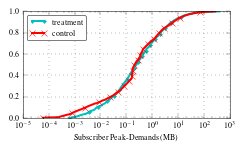

In [335]:
fig1, ax1 = plt.subplots(1,1)
ax2=  ax1
x, y = getCDF(list( df1.median() /10**6))
ax2.plot(x, y, lw=2, marker='.',  markevery=80,  label='treatment')
x2, y2 = getCDF(list( df2.median()/10**6))
ax2.plot( x2, y2, lw=2, marker='x',  markevery=240,label='control')
ax2.set_xscale('log')
ax1.set_xlabel('Subscriber Peak-Demands (MB)')
fig1.tight_layout()
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
#format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_demand-median.pdf')
fig1.show()

In [458]:
peak_mb1 = df1.quantile(0.95)/10**6
peak_mb2 = df2.quantile(0.95)/10**6

In [460]:
print "max peak demand", peak_mb1.describe(percentiles=[.05,.25,.5,.75,.95])
print "max peak demand", peak_mb2.describe(percentiles=[.05,.25,.5,.75,.95])

max peak demand count    1519.000000
mean      186.625628
std       226.621787
min         0.001539
5%          2.527783
25%        28.910405
50%        98.397739
75%       266.982877
95%       690.544084
max      3001.004548
dtype: float64
max peak demand count    4845.000000
mean      169.887346
std       220.424724
min         0.000300
5%          0.156540
25%         3.591005
50%        66.889911
75%       270.866074
95%       675.632562
max      2665.837985
dtype: float64


<IPython.core.display.Javascript object>


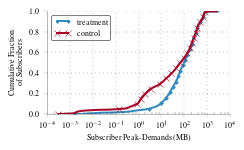

In [621]:
fig1, ax1 = plt.subplots(1,1)
ax2=  ax1
x, y = getCDF(peak_mb1)
ax2.plot(x, y, lw=2, marker='.',  markevery=80,  label='treatment')
x2, y2 = getCDF(peak_mb2)
ax2.plot( x2, y2, lw=2, marker='x', markevery=240, label='control')
ax2.set_xscale('log')
ax1.set_xlabel('Subscriber Peak-Demands (MB)')
ax1.set_ylabel('Cumulative Fraction\nof Subscribers')
fig1.tight_layout()
format_axes(ax1)
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_peak_demand-overall.pdf')
fig1.show()

In [570]:
percentiles = np.arange(0.00, 1, 0.01)
df_1 = df1.quantile(0.95)
tiles_1 = [df_1.quantile(x) for x in percentiles]
df_2 = df2.quantile(0.95)
tiles_2 = [df_2.quantile(x) for x in percentiles]
diff_list1 = [(tiles_1[i] - tiles_2[i])/10**6 for i in range(len(tiles_1))]
norm_diff_list1 = [(tiles_1[i] - tiles_2[i])/tiles_2[i] for i in range(len(tiles_1))]

<IPython.core.display.Javascript object>


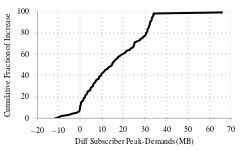

In [616]:
fig1, ax1 = plt.subplots(1,1)
x, y = getCDF(diff_list1)
ax1.plot( x, np.array(y)*100, lw=2, marker='', ls='-', color='k', label='diff')
#ax1.set_ylabel('Diff subscriber peak-demand (MB)')
ax1.grid(1)
ax1.set_xlabel('Diff Subscriber Peak-Demands (MB)')
ax1.set_ylabel('Cumulative Fraction of Increase')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_diff_perc95_bytes_subsc-overall.pdf')
fig1.show()

<IPython.core.display.Javascript object>


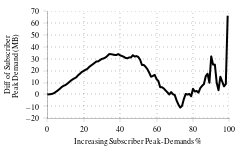

In [626]:
fig1, ax1 = plt.subplots(1,1)
#ax2 = ax1.twinx()
ax1.plot( diff_list1, lw=2, marker='', ls='-', color='k', label='diff')
ax1.set_ylabel('Diff of Subscriber\nPeak Demand (MB)')
#ax1.legend(loc=2)

#ax2=  ax1.twinx()
#x, y = getCDF(df1.quantile(0.95)/10**6)
#ax2.plot(y, x, lw=2, marker='.',  markevery=80,  label='treatment')
#x2, y2 = getCDF(df2.quantile(0.95)/10**6)
#ax2.plot(y2, x2, lw=2, marker='x', markevery=240, label='control')
#ax2.set_yscale('log')
#ax2.set_ylabel('Subscriber peak-demand (MB)')

#ax1.plot(percentiles, diff_list2, lw=2, markevery=10, label='daily 95th')
#ax1.legend(loc=8)
#ax1.set_xscale('log')
ax1.grid(1)

ax1.set_xlabel('Increasing Subscriber Peak-Demands \%')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'diff_perc95_bytes_subsc-overall_01.pdf')
fig1.show()

In [291]:
percentiles = np.arange(0.00, 1, 0.05)

In [574]:
df_1 = daily_perc95_df1.unstack().reset_index()[0]
tiles_1 = [df_1.quantile(x) for x in percentiles]
df_2 = daily_perc95_df2.unstack().reset_index()[0]
tiles_2 = [df_2.quantile(x) for x in percentiles]
diff_list2 = [(tiles_1[i] - tiles_2[i])/10**6 for i in range(len(tiles_1))]
norm_diff_list2 = [(tiles_1[i] - tiles_2[i])/tiles_2[i] for i in range(len(tiles_1))]

<IPython.core.display.Javascript object>


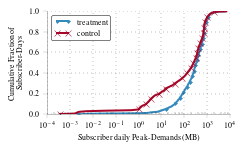

In [620]:
fig1, ax1 = plt.subplots(1,1)
ax2=  ax1
x, y = getCDF(daily_perc95_df1.quantile(0.95)/10**6)
ax2.plot(x, y, lw=2, marker='.',  markevery=80,  label='treatment')
x2, y2 = getCDF(daily_perc95_df2.quantile(0.95)/10**6)
ax2.plot( x2, y2, lw=2, marker='x', markevery=240, label='control')
ax2.set_xscale('log')
ax1.set_xlabel('Subscriber daily Peak-Demands (MB)')
ax1.set_ylabel('Cumulative Fraction of\nSubscriber-Days')
fig1.tight_layout()
format_axes(ax1)
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'cdf_peak_demand-daily.pdf')
fig1.show()

<IPython.core.display.Javascript object>


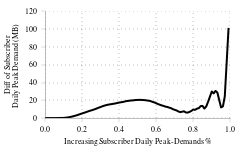

In [625]:
fig1, ax1 = plt.subplots(1,1)


#ax2 = ax1.twinx()
ax1.plot(percentiles, diff_list2, lw=2, ls='-', color='k', label='diff')
ax1.set_ylabel('Diff of Subscriber\nDaily Peak Demand (MB)')
#ax1.legend(loc=2)

#ax2 = ax1.twinx()
#x, y = getCDF(daily_perc95_df1.quantile(0.95)/10**6)
#ax2.plot(y, x, lw=2, marker='.',  markevery=80,  label='treatment')
#x2, y2 = getCDF(daily_perc95_df2.quantile(0.95)/10**6)
#ax2.plot(y2, x2, lw=2, marker='x', markevery=240, label='control')
#ax2.set_yscale('log')
#ax2.set_ylabel('Subscriber daily peak-demand (MB)')

#ax1.plot(percentiles, diff_list2, lw=2, markevery=10, label='daily 95th')
#ax1.legend(loc=8)
#ax1.set_xscale('log')
ax1.grid(1)

ax1.set_xlabel('Increasing Subscriber Daily Peak-Demands \%')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'diff_perc95_bytes_subsc-daily-overall_01.pdf')
fig1.show()

<IPython.core.display.Javascript object>


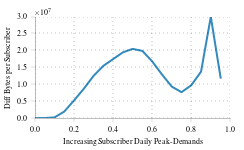

In [36]:
fig1, ax1 = plt.subplots(1,1)
#ax1.plot(percentiles, diff_list1, lw=2, marker='.', markevery=10)
ax1.plot(percentiles, diff_list2, lw=2, markevery=10, label='daily 95th')
#ax1.legend(loc='best')
#ax1.set_xscale('log')
ax1.grid(1)
ax1.set_ylabel('Diff Bytes per Subscriber')
ax1.set_xlabel('Increasing Subscriber Daily Peak-Demands')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'diff_perc95_bytes_subsc-daily-overall.pdf')
fig1.show()

In [610]:
(weekday1.mean(1)/10**6).describe(percentiles=[.05,.25,.5,.75,.95])

count    96.000000
mean     35.583531
std      15.923173
min      10.018153
5%       10.565336
25%      21.951802
50%      35.972635
75%      49.011006
95%      61.124074
max      62.299573
dtype: float64

In [611]:
(weekday2.mean(1)/10**6).describe(percentiles=[.05,.25,.5,.75,.95])

count    96.000000
mean     31.121663
std      15.326600
min       9.480987
5%       10.183529
25%      18.701849
50%      28.063685
75%      41.316908
95%      58.780401
max      60.436702
dtype: float64

In [612]:
(weekend1.mean(1)/10**6).describe(percentiles=[.05,.25,.5,.75,.95])

count    96.000000
mean     40.098859
std      17.382884
min       9.401888
5%        9.961526
25%      25.371804
50%      45.275043
75%      52.083106
95%      64.274916
max      65.850013
dtype: float64

In [609]:
(weekend2.mean(1)/10**6).describe(percentiles=[.05,.25,.5,.75,.95])

count    96.000000
mean     37.665321
std      16.213546
min       9.429537
5%       10.273061
25%      23.418193
50%      41.158077
75%      47.622520
95%      62.232448
max      63.151916
dtype: float64

In [40]:
from pandas.tseries.resample import TimeGrouper

In [6]:
daily_perc95_df12 = df1.groupby(TimeGrouper('1D')).apply(perc95)
daily_perc95_df22 = df2.groupby(TimeGrouper('1D')).apply(perc95)
daily_perc95_df12.to_pickle(OUTPUT + "daily_95perc_test.pkl")
daily_perc95_df22.to_pickle(OUTPUT + "daily_95perc_control.pkl")

In [ ]:
df_1 = daily_perc95_df1.unstack().reset_index()[0]
tiles_1 = [df_1.quantile(x) for x in percentiles]
df_2 = daily_perc95_df2.unstack().reset_index()[0]
tiles_2 = [df_2.quantile(x) for x in percentiles]
diff_list2 = [tiles_1[i] - tiles_2[i] for i in range(len(tiles_1))]
norm_diff_list2 = [(tiles_1[i] - tiles_2[i])/tiles_2[i] for i in range(len(tiles_1))]

<IPython.core.display.Javascript object>


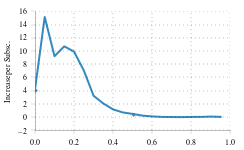

In [37]:
fig1, ax1 = plt.subplots(1,1)
ax1.plot(percentiles, norm_diff_list1, lw=2, marker='.', markevery=10)
#ax1.plot(percentiles, diff_list2, lw=2, markevery=10, label='daily 95th')
ax1.legend(loc='best')
#ax1.set_xscale('log')
ax1.grid(1)
ax1.set_ylabel('Increase per Subsc.')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'diff_perc95_bytes_subsc-daily-both-normalized.pdf')
fig1.show()

<IPython.core.display.Javascript object>


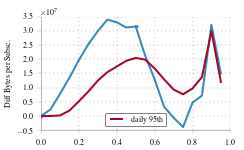

In [282]:
fig1, ax1 = plt.subplots(1,1)
ax1.plot(percentiles, diff_list1, lw=2, marker='.', markevery=10)
ax1.plot(percentiles, diff_list2, lw=2, markevery=10, label='daily 95th')
ax1.legend(loc='best')
#ax1.set_xscale('log')
ax1.grid(1)
ax1.set_ylabel('Diff Bytes per Subsc.')
fig1.tight_layout()
format_axes(ax1)
#fig1.savefig(PLOTS + 'diff_perc95_bytes_subsc.pdf')
fig1.show()

In [257]:
df_1 = df1.max()
tiles_1 = [df_1.quantile(x) for x in np.arange(0.05, 1.00, 0.05)]
df_2 = df2.max()
tiles_2 = [df_2.quantile(x) for x in np.arange(0.05, 1.00, 0.05)]
diff_list1 = [tiles_1[i] - tiles_2[i] for i in range(len(tiles_1))]


In [258]:
df_1 = df1.resample('1D', how='max').unstack().reset_index()[0]
tiles_1 = [df_1.quantile(x) for x in np.arange(0.05, 1.00, 0.05)]
df_2 = df2.resample('1D', how='max').unstack().reset_index()[0]
tiles_2 = [df_2.quantile(x) for x in np.arange(0.05, 1.00, 0.05)]
diff_list2 = [tiles_1[i] - tiles_2[i] for i in range(len(tiles_1))]

<IPython.core.display.Javascript object>


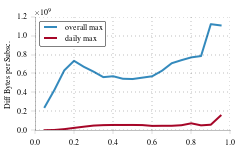

In [260]:
fig1, ax1 = plt.subplots(1,1)
ax1.plot(np.arange(0.05, 1.00, 0.05), diff_list1, lw=2, markevery=10, label='overall max')
ax1.plot(np.arange(0.05, 1.00, 0.05), diff_list2, lw=2, markevery=10, label='daily max')
ax1.legend(loc='best')
#ax1.set_xscale('log')
ax1.grid(1)
ax1.set_ylabel('Diff Bytes per Subsc.')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'diff_max_bytes_subsc.pdf')
fig1.show()

## WHAT ISP SEES: AVG CONTRIBUTION PER SUBSCRIBER

In [165]:
N1 = len(df1.columns)
N2 = len(df2.columns)
CONVERT_N1 = 1000/N1
CONVERT_N2 = 1000/N2

### AVG SUBSCRIBER

In [135]:
# no device, only time
isp_df1 = df1.sum(1)/N1 #* CONVERT_N1
isp_df2 = df2.sum(1)/N2 #* CONVERT_N2

In [136]:
SAMPLE = 3
SAMPLE_PTS = len(isp_df1)//SAMPLE
# SAMPLE_PTS:2*SAMPLE_PTS
df_temp1 = isp_df1.iloc[:SAMPLE_PTS]
df_temp2 = isp_df2.iloc[:SAMPLE_PTS]

df_1 = isp_df1.iloc[:SAMPLE_PTS].reset_index()
df_2 = isp_df2.iloc[:SAMPLE_PTS].reset_index()

In [152]:
df_temp1 = isp_df1
df_temp2 = isp_df2

<IPython.core.display.Javascript object>


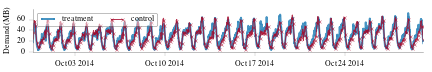

In [451]:
fig1, ax1 = plt.subplots(1,1, figsize=(6,1))
#ax1.plot(df['datetime'],df[0])
ax1.plot_date(df_temp1.index, df_temp1/10**6, marker='.', ls='-', markevery=10,  markersize=3, lw=2, alpha=0.9, label='treatment')
ax1.plot_date(df_temp2.index, df_temp2/10**6, marker='x', ls='-', markevery=10, markersize=3, lw=1, alpha=0.8, label='control')
#ax1.plot_date(df_temp2.index, df_temp2, marker='', ls='-')
#ax1.set_ylim([0,800])
leg = ax1.legend(loc='upper left',ncol=2)
leg.get_frame().set_alpha(0.5)
ax1.yaxis.set_ticks(np.arange(0,80,20))
ax1.set_ylabel("Demand (MB)")
fig1.tight_layout()
format_axes(ax1)
#fig1.savefig(PLOTS + "mean_traffic_demand_per_subscriber_test")
fig1.savefig(PLOTS + "traffic_demand_Oct.pdf")

# GENERIC WEEKDAY

In [5]:
weekday = defaultdict(int)
def getWeekday(x):
    if x in weekday:
        return weekday[x]
    else:
        weekday[x] = x.weekday()
        return weekday[x]
time = defaultdict(int)
def getTime(x):
    if x in time:
        return time[x]
    else:
        time[x] = x.time()
        return time[x]
a = map(getWeekday, df1.index)
b = map(getTime, df1.index)

In [9]:
#x = df1.stack().reset_index()
#x['weekday'] = x['datetime'].apply(lambda x: getWeekday(x))

In [10]:
#x['time'] = x['datetime'].apply(lambda x: getTime(x))

In [12]:
#x.rename(columns={0:'octets_passed'}).to_pickle(OUTPUT + "test_weekday_time.pkl")

In [13]:
#g = x.groupby(['Device_number', 'weekday', 'time'])

In [15]:
#mean_time_day = g[0].mean()

In [18]:
#tp = mean_time_day * CONVERT_OCT

In [35]:
#by_day = tp.unstack(1)
#weekdays = by_day[[0,1,2,3,4]].mean(1).unstack(-2)
#weekends = by_day[[5,6]].mean(1).unstack(-2)

In [44]:
#a1 = weekdays.mean(1)
#a2 = weekdays.quantile(.95,axis=1)

<IPython.core.display.Javascript object>


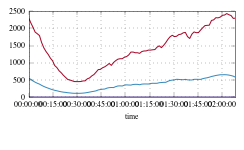

In [72]:
#fig1, ax1 = plt.subplots(1,1)
#a1.plot(ax=ax1)
#a2.plot(ax=ax1)
#ax1.set_xticklabels(a1.index,rotation=90)
#fig1.tight_layout()

In [105]:
def get_weekday_time_groups():
    '''run on dp7 in final folder'''

    for folder in ['final_dw/', 'final_up/']:

        for dataset in ['test', 'control']:
            df = pd.read_pickle(folder + dataset + '.pkl')
            #CONVERT_N = 1000.0 / len(df['Device_number'].unique())
            g = df.groupby(['Device_number', 'day', 'time'])
        
            mean_time_day = g['octets_passed'].mean()
            tp_mean = (mean_time_day).unstack(1)
            weekdays = tp_mean[[0,1,2,3,4]].mean(1).unstack(-2)
            weekends = tp_mean[[5,6]].mean(1).unstack(-2)
            weekdays.to_pickle(folder + dataset + "_weekday_mean.pkl")
            weekends.to_pickle(folder + dataset + "_weekend_mean.pkl")
            print "save mean scaled bytes transfered per time slot per subs over a week"
            
            perc95_time_day = g['octets_passed'].quantile(.95)
            tp_perc95 = (mean_time_day).unstack(1)
            weekdays = tp_perc95[[0,1,2,3,4]].quantile(0.95, 1).unstack(-2)
            weekends = tp_perc95[[5,6]].quantile(0.95, 1).unstack(-2)
            weekdays.to_pickle(folder + dataset + "_weekday_95.pkl")
            weekends.to_pickle(folder + dataset + "_weekend_95.pkl")
            print "save 95 perc scaled bytes transfered per time slot per subs over a week"

# COMBO

In [20]:
#folder = "final_dw"
weekday1 = pd.read_pickle("final_processed/"+folder+"/test_weekday_mean.pkl")
weekday2 = pd.read_pickle("final_processed/"+folder+"/control_weekday_mean.pkl")
weekend1 = pd.read_pickle("final_processed/"+folder+"/test_weekend_mean.pkl")
weekend2 = pd.read_pickle("final_processed/"+folder+"/control_weekend_mean.pkl")     

In [320]:
#folder = "final_dw"
weekday1_peak = pd.read_pickle("final_processed/"+folder+"/test_weekday_95.pkl")
weekday2_peak = pd.read_pickle("final_processed/"+folder+"/control_weekday_95.pkl")
weekend1_peak = pd.read_pickle("final_processed/"+folder+"/test_weekend_95.pkl")
weekend2_peak = pd.read_pickle("final_processed/"+folder+"/control_weekend_95.pkl")     

In [629]:
def time_of_day_plot(m1, m2, p1, p2, label1, label2):
    fig1, ax1 = plt.subplots(1,1)
    
    xticks = m1.index
    #ax1.plot(range(len(xticks)), MEDIAN_RATIO, label='median')
    ax1.plot(range(len(xticks)), m1, marker = '|', color='k', lw=2, label=label1+'-t', alpha=0.5)
    ax1.plot(range(len(xticks)), m2, marker = '.', color='r', label=label1+'-c', ls='--', alpha=0.5)
    ax1.plot(range(len(xticks)), p1, marker = '|', color='b', lw=2, label=label2+'-t', alpha=0.5)
    ax1.plot(range(len(xticks)), p2, marker = '.', color='g', label=label2+'-c', ls='--', alpha=0.5)

    xtickers = np.arange(0, len(xticks), 8)
    xticklabelers = [m1.index[x].strftime("%H:%M") for x in xtickers]
    ax1.set_xticks(xtickers)
    ax1.set_xticklabels(xticklabelers,rotation=90)

    ax1.grid(1)
    ax1.legend(loc='best')
    ax1.set_ylabel("Demand (Bytes)")
    fig1.tight_layout()
    format_axes(ax1)
    
    return fig1

In [639]:
def plot_of_day_plot(r1, r2, label1, label2):
    fig1, ax1 = plt.subplots(1,1)
    
    xticks = r1.index
    #ax1.plot(range(len(xticks)), MEDIAN_RATIO, label='median')
    ax1.plot(range(len(xticks)), r1, marker = 'x', lw=2, markevery=5, label=label1, alpha=0.5)
    ax1.plot(range(len(xticks)), r2, marker = '.', lw=2, markevery=5, label=label2, alpha=0.5)
    
    xtickers = np.arange(0, len(xticks), 8)
    xticklabelers = [r1.index[x].strftime("%H:%M") for x in xtickers]
    ax1.set_xticks(xtickers)
    ax1.set_xticklabels(xticklabelers,rotation=90)

    ax1.grid(1)
    ax1.legend(loc='best')
    ax1.set_ylabel("Demand per subscriber (MB)")
    #ax1.set_ylabel("demand ratio")
    fig1.tight_layout()
    format_axes(ax1)
    
    return fig1

## WEEKDAY

In [640]:
M_1 = weekday1.mean(1)
P95_1 = weekday1.quantile(.95,axis=1)
M_2 = weekday2.mean(1)
P95_2 = weekday2.quantile(.95,axis=1)
ME_1 = weekend1.mean(1)
P95E_1 = weekend1.quantile(.95,axis=1)
ME_2 = weekend2.mean(1)
P95E_2 = weekend2.quantile(.95,axis=1)

<IPython.core.display.Javascript object>


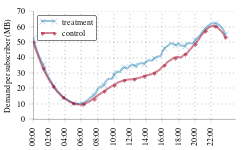

<IPython.core.display.Javascript object>


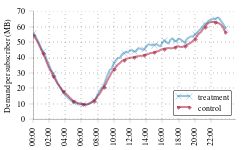

In [641]:
fig1 = plot_of_day_plot(M_1/10**6, M_2/10**6, 'treatment', 'control')

fig1.savefig(PLOTS + "weekday_demand_mean.pdf")
fig1.show()

fig1 = plot_of_day_plot(ME_1/10**6, ME_2/10**6, 'treatment', 'control')
fig1.savefig(PLOTS + "weekend_demand_mean.pdf")
fig1.show()

<IPython.core.display.Javascript object>


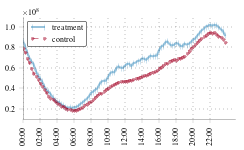

<IPython.core.display.Javascript object>


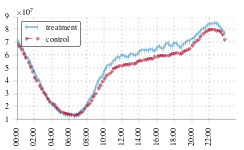

In [338]:
M_1 = weekday1_peak.mean(1)
P95_1 = weekday1_peak.quantile(.95,axis=1)
M_2 = weekday2_peak.mean(1)
P95_2 = weekday2_peak.quantile(.95,axis=1)
ME_1 = weekend1_peak.mean(1)
P95E_1 = weekend1_peak.quantile(.95,axis=1)
ME_2 = weekend2_peak.mean(1)
P95E_2 = weekend2_peak.quantile(.95,axis=1)

fig1 = ratio_of_day_plot(M_1, M_2, 'treatment', 'control')
fig1.show()
fig1.savefig(PLOTS + "weekday_peak_demand_mean.pdf")

fig1 = ratio_of_day_plot(ME_1, ME_2, 'treatment', 'control')
fig1.show()
fig1.savefig(PLOTS + "weekend_peak_demand_mean.pdf")

In [ ]:
def ratio_of_day_plot(r1, r2, label1, label2):
    fig1, ax1 = plt.subplots(1,1)
    
    xticks = r1.index
    #ax1.plot(range(len(xticks)), MEDIAN_RATIO, label='median')
    ax1.plot(range(len(xticks)), r1, marker = '|', color='k', lw=2, label=label1, alpha=0.5)
    ax1.plot(range(len(xticks)), r2, marker = '.', color='r', ls='--', label=label2, alpha=0.5)
    
    xtickers = np.arange(0, len(xticks), 8)
    xticklabelers = [r1.index[x].strftime("%H:%M") for x in xtickers]
    ax1.set_xticks(xtickers)
    ax1.set_xticklabels(xticklabelers,rotation=90)

    ax1.grid(1)
    ax1.legend(loc='best')
    ax1.set_ylabel("demand ratio")
    fig1.tight_layout()
    format_axes(ax1)
    
    return fig1

<IPython.core.display.Javascript object>


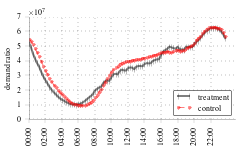

61124074.2746 62232448.0899 224903587.465 243976202.203


In [308]:
fig1 = time_of_day_plot(M_1, M_2, P95_1, P95_2, 'mean', '95\%')
print M_1.quantile(0.95), M_2.quantile(0.95), P95_1.quantile(0.95), P95_2.quantile(0.95)
fig1.show()
fig1.savefig("weekday_demand_mean_perc95.pdf")

fig1 = time_of_day_plot(MED_1, MED_2, MAX_1, MAX_2, 'median', 'max')
fig1.show()
fig1.savefig("weekday_demand_median_max.pdf")

<IPython.core.display.Javascript object>


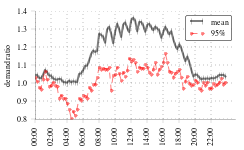

<IPython.core.display.Javascript object>


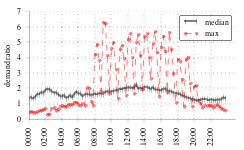

In [422]:
fig1 = ratio_of_day_plot(MEAN_RATIO, PERC_RATIO, 'mean', '95\%')
fig1.show()
fig1.savefig("weekday_ratio_mean_perc95.pdf")

fig1 = ratio_of_day_plot(MEDIAN_RATIO, MAX_RATIO, 'median', 'max')
fig1.show()
fig1.savefig("weekday_ratio_median_max.pdf")

## WEEKEND

In [313]:
ME_1 = weekend1.mean(1)
P95E_1 = weekend1.quantile(.95,axis=1)
ME_2 = weekend2.mean(1)
P95E_2 = weekend2.quantile(.95,axis=1)
MEDIAN_RATIO = weekend1.median(1)/weekend2.median(1)
MEAN_RATIO = ME_1/ME_2
PERC_RATIO = P95E_1/P95E_2

MED_1 = weekend1.median(1)
MED_2 = weekend2.median(1)
MAX_1 = weekend1.max(1)
MAX_2 = weekend2.max(1)
MEDIAN_RATIO = MED_1/MED_2
MAX_RATIO = MAX_1/MAX_2

<IPython.core.display.Javascript object>


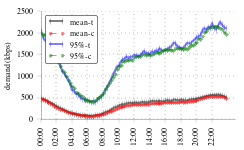

557.941980598 540.212223003 2138.22582059 2117.84897745


<IPython.core.display.Javascript object>


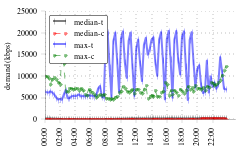

In [433]:
fig1 = time_of_day_plot(ME_1, ME_2, P95E_1, P95E_2, 'mean', '95\%')
fig1.show()
fig1.savefig("weekend_demand_mean_perc95.pdf")
print ME_1.quantile(0.95), ME_2.quantile(0.95), P95E_1.quantile(0.95), P95E_2.quantile(0.95)

fig1 = time_of_day_plot(MED_1, MED_2, MAX_1, MAX_2, 'median', 'max')
fig1.show()
fig1.savefig("weekend_demand_median_max.pdf")

<IPython.core.display.Javascript object>


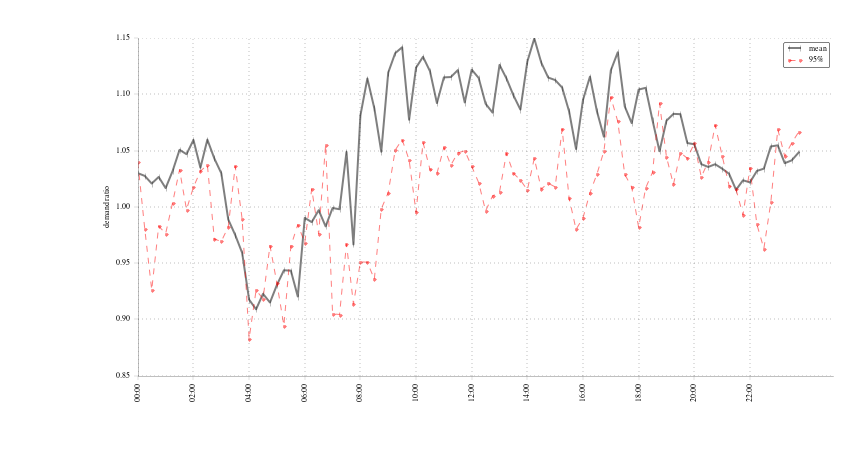

<IPython.core.display.Javascript object>


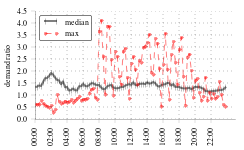

In [425]:
fig1 = ratio_of_day_plot(MEAN_RATIO, PERC_RATIO, 'mean', '95\%')
fig1.show()
fig1.savefig("weekend_ratio_mean_perc95.pdf")

fig1 = ratio_of_day_plot(MEDIAN_RATIO, MAX_RATIO, 'median', 'max')
fig1.show()
fig1.savefig("weekend_ratio_median_max.pdf")

# WORST ISP TIMES

<IPython.core.display.Javascript object>


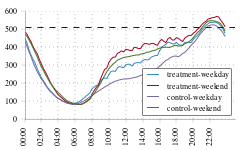

500.715746996 time
21:15:00    508.687158
21:30:00    521.461352
21:45:00    530.456858
22:00:00    538.959879
22:15:00    538.683730
22:30:00    540.794909
22:45:00    538.053639
23:00:00    530.993116
23:15:00    519.493545
23:30:00    504.567977
dtype: float64
530.648324683 time
20:45:00    510.108629
21:00:00    525.406272
21:15:00    537.197002
21:30:00    544.014951
21:45:00    557.202619
22:00:00    560.160065
22:15:00    564.895708
22:30:00    565.678120
22:45:00    571.614692
23:00:00    568.989883
23:15:00    551.454989
23:30:00    535.890377
23:45:00    516.575732
dtype: float64
482.973871304 time
21:00:00    483.872001
21:15:00    496.621117
21:30:00    507.640420
21:45:00    518.064897
22:00:00    523.350420
22:15:00    524.624150
22:30:00    524.497046
22:45:00    518.980589
23:00:00    507.180152
23:15:00    496.840630
dtype: float64
511.361561048 time
20:45:00    491.454163
21:00:00    508.118294
21:15:00    521.835043
21:30:00    535.875137
21:45:00    544.324116
22:00

In [426]:
fig1, ax1 = plt.subplots(1,1)
PERC=0.9

df = weekday1
LIM = df.mean(1).quantile(PERC)
xticks = df.index
ax1.plot(range(len(xticks)), df.mean(1), label='treatment-weekday')
print df.mean(1).quantile(PERC), df.mean(1)[df.mean(1) > LIM]
#ax1.axhline( df.mean(1).quantile(.9) )

df = weekend1
xticks = df.index
ax1.plot(range(len(xticks)), df.mean(1), label='treatment-weekend')
print df.mean(1).quantile(PERC), df.mean(1)[df.mean(1) > LIM]

df = weekday2
LIM = df.mean(1).quantile(PERC)
ax1.plot(range(len(xticks)), df.mean(1), label='control-weekday')
print df.mean(1).quantile(PERC), df.mean(1)[df.mean(1) > LIM]

df = weekend2
xticks = df.index
ax1.plot(range(len(xticks)), df.mean(1), label='control-weekend')
print df.mean(1).quantile(PERC), df.mean(1)[df.mean(1) > LIM]

ax1.axhline( df.mean(1).quantile(PERC), ls='--' )

xtickers = np.arange(0, len(xticks), 8)
xticklabelers = [xticks[x].strftime("%H:%M") for x in xtickers]
ax1.set_xticks(xtickers)
ax1.set_xticklabels(xticklabelers,rotation=90)
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.show()

In [427]:
df = weekday1
print df.shape, df.mean(1).describe()
df = weekday2
print df.shape, df.mean(1).describe()
df = weekend1
print df.shape, df.mean(1).describe()
df = weekend2
print df.shape, df.mean(1).describe()

(96, 1519) count     96.000000
mean     308.884814
std      138.221985
min       86.963137
25%      190.553834
50%      312.262458
75%      425.442764
max      540.794909
dtype: float64
(96, 4845) count     96.000000
mean     270.153324
std      133.043400
min       82.300232
25%      162.342442
50%      243.608378
75%      358.653716
max      524.624150
dtype: float64
(96, 1519) count     96.000000
mean     348.080373
std      150.893088
min       81.613614
25%      220.241356
50%      393.012526
75%      452.110297
max      571.614692
dtype: float64
(96, 4845) count     96.000000
mean     326.955908
std      140.742584
min       81.853618
25%      203.282925
50%      357.274972
75%      413.389931
max      548.193712
dtype: float64


# SEPARATE OUT THE HEAVY/LIGHT USERS

### WEEKDAY

In [449]:
def partition_heavy_light(df, algo='normal'):
    """
    if, on a particular a timestamp in a day, the device mean
    is higher than the dataset mean, it is a temp heavy
    if that device's mean throughout all timestamps in a day is
    ALSO higher than the mean of such temp heavy devices, it is heavy
    """
    print Counter(df.idxmax(1))
    
    temp_heavy = df.T[df.T > df.T.mean()]
    
    if algo=='agg':
        # aggressive: compare with original dataframe mean
        heavy_devs = temp_heavy[temp_heavy.mean(1) > df.mean(1).mean()].index
    elif algo=='sum':
        # heavy by sum in a day:
        heavy_devs = df.T[df.sum() > df.sum().mean()].index
    else:
        # heavy by contribution in timestamp more than mean of contributors (described above)
        heavy_devs = temp_heavy[temp_heavy.mean(1) > temp_heavy.mean(1).mean()].index
    
    light_devs = [x for x in df.columns if x not in heavy_devs]

    df_heavy = df[heavy_devs]
    df_light = df[light_devs]
    print "Heavy: ", df_heavy.shape, df_heavy.mean(1).describe(percentiles=[0.5, 0.95])
    print "Light: ", df_light.shape, df_light.mean(1).describe(percentiles=[0.5, 0.95])
    return df_heavy, df_light

In [450]:
ds = 'weekday_agg'
heavy1, light1 = partition_heavy_light(weekday1, 'agg')
heavy2, light2 = partition_heavy_light(weekday2, 'agg')

Counter({20703: 49, 22024: 21, 20692: 10, 20970: 5, 21008: 3, 20048: 2, 20482: 2, 22193: 2, 21127: 1, 20649: 1})
Heavy:  (96, 987) count     96.000000
mean     442.827255
std      200.291338
min      121.554871
50%      447.809568
95%      762.993060
max      780.294034
dtype: float64
Light:  (96, 532) count     96.000000
mean      60.386337
std       23.778854
min       20.728839
50%       62.974861
95%       98.401195
max      101.958254
dtype: float64
Counter({19713: 43, 5443: 18, 2120: 11, 3996: 4, 2669: 3, 19449: 3, 4389: 2, 19403: 2, 3502: 2, 5615: 2, 19035: 2, 3026: 1, 611: 1, 19865: 1, 2525: 1})
Heavy:  (96, 2611) count     96.000000
mean     477.111804
std      236.705222
min      143.526507
50%      432.327131
95%      903.335841
max      928.009657
dtype: float64
Light:  (96, 2234) count    96.000000
mean     28.269443
std      12.266622
min      10.209999
50%      25.874530
95%      51.712202
max      53.645455
dtype: float64


<IPython.core.display.Javascript object>


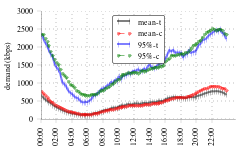

<IPython.core.display.Javascript object>


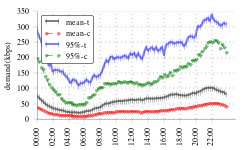

<IPython.core.display.Javascript object>


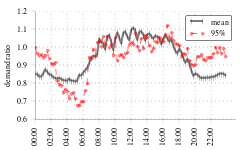

<IPython.core.display.Javascript object>


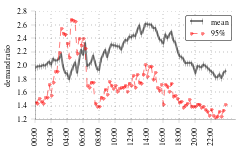

In [446]:
fig1 = time_of_day_plot( heavy1.mean(1), heavy2.mean(1),
                        heavy1.quantile(.95,axis=1), heavy2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("heavy_"+ds+"_demand_mean_perc95.pdf")
fig1.show()

fig1 = time_of_day_plot( light1.mean(1), light2.mean(1),
                        light1.quantile(.95,axis=1), light2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("light_"+ds+"_demand_mean_perc95.pdf")
fig1.show()

fig1 = ratio_of_day_plot( heavy1.mean(1)/heavy2.mean(1),
                        heavy1.quantile(.95,axis=1)/heavy2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("heavy_"+ds+"_ratio_mean_perc95.pdf")
fig1.show()

fig1 = ratio_of_day_plot( light1.mean(1)/light2.mean(1),
                        light1.quantile(.95,axis=1)/light2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("light_"+ds+"_ratio_mean_perc95.pdf")
fig1.show()

In [447]:
ds = 'weekend_agg'
heavy1, light1 = partition_heavy_light(weekend1, 'agg')
heavy2, light2 = partition_heavy_light(weekend2, 'agg')

Counter({20703: 37, 20692: 21, 20048: 10, 22024: 9, 21008: 9, 21344: 2, 21063: 2, 20970: 2, 20740: 1, 22003: 1, 20993: 1, 21386: 1})
Heavy:  (96, 973) count     96.000000
mean     514.914463
std      226.423942
min      115.915669
50%      578.939228
95%      833.743216
max      853.724220
dtype: float64
Light:  (96, 546) count    96.000000
mean     50.773469
std      17.047564
min      18.958958
50%      59.537246
95%      69.456921
max      72.767549
dtype: float64
Counter({19713: 36, 19048: 15, 19865: 11, 19035: 6, 3094: 5, 19403: 3, 1952: 2, 18563: 2, 3502: 2, 19924: 2, 3996: 2, 3878: 1, 3188: 1, 19562: 1, 4652: 1, 5615: 1, 19282: 1, 18931: 1, 2366: 1, 3262: 1, 1151: 1})
Heavy:  (96, 2786) count     96.000000
mean     547.905683
std      237.795083
min      134.755524
50%      598.915895
95%      908.540179
max      920.509492
dtype: float64
Light:  (96, 2059) count    96.000000
mean     27.992298
std       9.861853
min       9.739886
50%      30.915355
95%      42.140740
max      

<IPython.core.display.Javascript object>


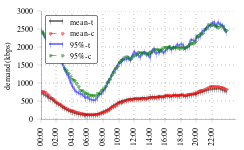

<IPython.core.display.Javascript object>


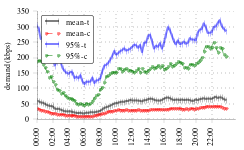

<IPython.core.display.Javascript object>


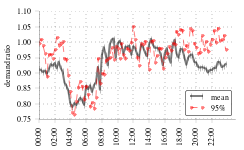

<IPython.core.display.Javascript object>


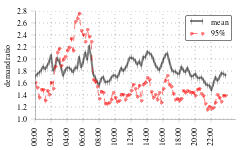

In [448]:
fig1 = time_of_day_plot( heavy1.mean(1), heavy2.mean(1),
                        heavy1.quantile(.95,axis=1), heavy2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("heavy_"+ds+"_demand_mean_perc95.pdf")
fig1.show()

fig1 = time_of_day_plot( light1.mean(1), light2.mean(1),
                        light1.quantile(.95,axis=1), light2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("light_"+ds+"_demand_mean_perc95.pdf")
fig1.show()

fig1 = ratio_of_day_plot( heavy1.mean(1)/heavy2.mean(1),
                        heavy1.quantile(.95,axis=1)/heavy2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("heavy_"+ds+"_ratio_mean_perc95.pdf")
fig1.show()

fig1 = ratio_of_day_plot( light1.mean(1)/light2.mean(1),
                        light1.quantile(.95,axis=1)/light2.quantile(.95,axis=1),
                        'mean', '95\%')
fig1.savefig("light_"+ds+"_ratio_mean_perc95.pdf")
fig1.show()

In [295]:

temp_heavy = weekday1.T[weekday1.T > weekday1.T.mean()]
heavy_devs_1 = temp_heavy[temp_heavy.mean(1) > temp_heavy.mean(1).mean()].index
light_devs_1 = [x for x in weekday1.columns if x not in heavy_devs_1]

heavy_week_1 = weekday1[heavy_devs_1]
light_week_1 = weekday1[light_devs_1]
print "Heavy test: ", heavy_week_1.mean().describe()
print "Light test: ", light_week_1.mean().describe()

temp_heavy = weekday2.T[weekday2.T > weekday2.T.mean()]
heavy_devs_2 = temp_heavy[temp_heavy.mean(1) > temp_heavy.mean(1).mean()].index
light_devs_2 = [x for x in weekday2.columns if x not in heavy_devs_2]

heavy_week_2 = weekday2[heavy_devs_2]
light_week_2 = weekday2[light_devs_2]

print "Heavy control: ", heavy_week_2.mean().describe()
print "Light control: ", light_week_2.mean().describe()

Counter({20703: 49, 22024: 21, 20692: 10, 20970: 5, 21008: 3, 20048: 2, 20482: 2, 22193: 2, 21127: 1, 20649: 1})
Counter({19713: 43, 5443: 18, 2120: 11, 3996: 4, 2669: 3, 19449: 3, 4389: 2, 19403: 2, 3502: 2, 5615: 2, 19035: 2, 3026: 1, 611: 1, 19865: 1, 2525: 1})
Heavy test:  count      409.000000
mean       752.660808
std        707.961123
min         74.307492
25%        393.857100
50%        600.346635
75%        950.530847
max      10269.211023
dtype: float64
Light test:  count    1110.000000
mean      145.367353
std       122.285884
min         0.016514
25%        48.279429
50%       112.625195
75%       215.061683
max       639.342202
dtype: float64
Heavy control:  count    1161.000000
mean      764.054537
std       457.017952
min        41.110740
25%       472.744387
50%       668.105923
75%       944.871207
max      4113.559968
dtype: float64
Light control:  count    3684.000000
mean      114.502046
std       135.685455
min         0.000723
25%         5.968775
50%        54.3

<IPython.core.display.Javascript object>


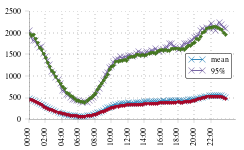

In [176]:
fig1, ax1 = plt.subplots(1,1)

xticks = ME_1.index
#ax1.plot(range(len(xticks)), MEDIAN_RATIO, label='median')
ax1.plot(range(len(xticks)), ME_1, marker = 'x', label='mean')
ax1.plot(range(len(xticks)), ME_2, marker = '.')
ax1.plot(range(len(xticks)), P95E_1, marker = 'x', label='95\%')
ax1.plot(range(len(xticks)), P95E_2, marker = '.')

xtickers = np.arange(0, len(xticks), 8)
xticklabelers = [MEAN_RATIO.index[x].strftime("%H:%M") for x in xtickers]
ax1.set_xticks(xtickers)
ax1.set_xticklabels(xticklabelers,rotation=90)

ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.show()

<IPython.core.display.Javascript object>


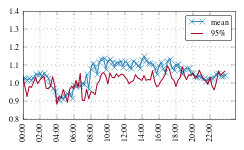

In [168]:
fig1, ax1 = plt.subplots(1,1)

xticks = MEAN_RATIO.index
#ax1.plot(range(len(xticks)), MEDIAN_RATIO, label='median')
ax1.plot(range(len(xticks)), MEAN_RATIO, marker = 'x', label='mean')
ax1.plot(range(len(xticks)), PERC_RATIO, label='95\%')

xtickers = np.arange(0, len(xticks), 8)
xticklabelers = [MEAN_RATIO.index[x].strftime("%H:%M") for x in xtickers]
ax1.set_xticks(xtickers)
ax1.set_xticklabels(xticklabelers,rotation=90)


ax1.set_ylim([0.8, 1.4])
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
fig1.show()

In [19]:
df_r.quantile(.95)

2205.2379041666641

In [107]:
df1.mean().mean()

36878008.146260984

In [110]:
df1.apply(perc95).mean()

186625628.29670826

In [55]:
by_device = df1.describe(percentiles=[0.05,0.50,0.95])

In [56]:
by_device.mean(1)

count    8.046929e+03
mean     3.687801e+07
std      1.081401e+08
min      6.247987e+03
5%       9.088700e+04
50%      3.871090e+06
95%      1.866256e+08
max      2.342543e+09
dtype: float64

In [79]:
print df1.resample('D', how='sum').sum(1).mean()
print df2.resample('D', how='sum').sum(1).mean()

4.86746330918e+12
1.40668706543e+13


In [80]:
print df1.resample('D', how='mean').mean().mean() * CONVERT_OCT
print df2.resample('D', how='mean').mean().mean() * CONVERT_OCT

388.288831247
349.95164658


In [102]:
from pandas.tseries.resample import TimeGrouper

daily_perc95_df1 = df1.groupby(TimeGrouper('1D')).apply(perc95)
daily_perc95_df2 = df1.groupby(TimeGrouper('1D')).apply(perc95)

In [ ]:
df1.apply(perc95)